# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
#MOMENTUM = 0.85


In [11]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    #optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    optimizer = keras.optimizers.RMSprop(lr=lr, rho=0.9, epsilon=None, decay=0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0718 17:17:09.795805 27608 deprecation_wrapper.py:119] From c:\users\kehua\.conda\envs\keras\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0718 17:17:09.878880 27608 deprecation.py:323] From c:\users\kehua\.conda\envs\keras\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 117us/step - loss: 14.4438 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 6s 117us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 114us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 117us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 114us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 113us/step - loss: 14.5063 - acc: 0.1000 - val_lo

50000/50000 [==============================] - 6s 113us/step - loss: 2.3630 - acc: 0.2120 - val_loss: 1.9508 - val_acc: 0.3003
Epoch 2/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.8930 - acc: 0.3149 - val_loss: 1.9445 - val_acc: 0.2835
Epoch 3/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.7884 - acc: 0.3594 - val_loss: 1.8781 - val_acc: 0.3272
Epoch 4/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.7207 - acc: 0.3850 - val_loss: 1.7947 - val_acc: 0.3381
Epoch 5/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.6639 - acc: 0.4033 - val_loss: 1.8010 - val_acc: 0.3722
Epoch 6/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.6161 - acc: 0.4228 - val_loss: 1.7643 - val_acc: 0.3696
Epoch 7/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.5753 - acc: 0.4379 - val_loss: 1.6924 - val_acc: 0.3859
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 6s 112us/step - loss: 1.7946 - acc: 0.3663 - val_loss: 1.8808 - val_acc: 0.3240
Epoch 3/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.7178 - acc: 0.3929 - val_loss: 1.7203 - val_acc: 0.3788
Epoch 4/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.6594 - acc: 0.4134 - val_loss: 1.7215 - val_acc: 0.3897
Epoch 5/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.6165 - acc: 0.4287 - val_loss: 1.6140 - val_acc: 0.4269
Epoch 6/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.5794 - acc: 0.4414 - val_loss: 1.6660 - val_acc: 0.3970
Epoch 7/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.5497 - acc: 0.4523 - val_loss: 1.5949 - val_acc: 0.4320
Epoch 8/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.5201 - acc: 0.4629 - val_loss: 1.6587 - val_acc: 0.4163
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 6s 114us/step - loss: 1.8775 - acc: 0.3463 - val_loss: 1.8561 - val_acc: 0.3437
Epoch 4/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.8294 - acc: 0.3609 - val_loss: 1.8176 - val_acc: 0.3629
Epoch 5/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.7933 - acc: 0.3735 - val_loss: 1.7827 - val_acc: 0.3824
Epoch 6/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.7655 - acc: 0.3830 - val_loss: 1.7622 - val_acc: 0.3886
Epoch 7/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.7412 - acc: 0.3928 - val_loss: 1.7391 - val_acc: 0.3923
Epoch 8/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.7201 - acc: 0.3982 - val_loss: 1.7304 - val_acc: 0.3967
Epoch 9/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.7012 - acc: 0.4070 - val_loss: 1.7177 - val_acc: 0.3960
Epoch 10/50
50000/50000 [====================

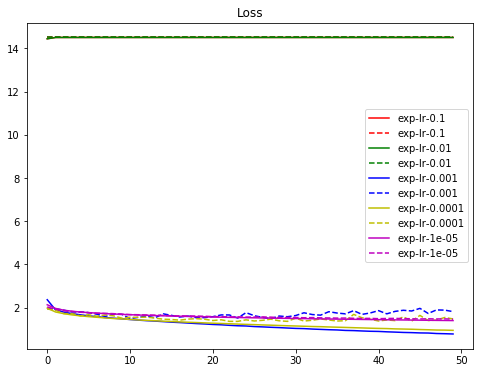

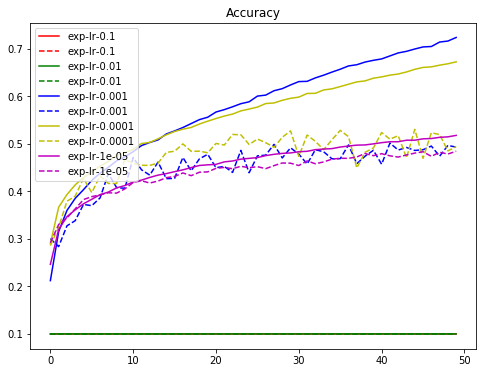

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()